<h1><center>Company growth and Trend Analysis 
    using Machine Learning
</center></h1>

<h3><center>(PART 2)</center></h3>

<p><center><b> Author: </b> Vishak Gopkumar</center></p>

<p><center><b>SAP ID: </b>  </center></p>


<p><center><b>Project Mentor:</b> </center></p>



### Part 2: 

**Company Growth and Survival Prediction:** To build a predictive model that can estimate the likelihood of a newly registered company's growth and survival based on historical data. This can involve analyzing factors such as capital structure, initial investment, industry sector, and geographical location to provide insights into the potential success or failure of a company.


#### **Table of contents**

* **Data Loading / Preparation:** Load the data and understand the basic structure of the dataset.

* **Data Preprocessing:** Clean the data by handling missing values, outliers, and data errors. We'll also transform variables if needed.

* **Exploratory Data Analysis (EDA):** Understand the data and identify possible trends, patterns, and relationships between the variables.

* **Feature Engineering and Selection:** Create new features that might help improve the model's performance. Also, select the most relevant features for the model.

* **Model Building:** Train the model using different machine learning algorithms.

* **Model Evaluation**: Evaluate the model's performance using appropriate metrics.

* **Model Tuning**: Tune the model's hyperparameters to improve its performance.

* **Model Interpretability**: SHAP (SHapley Additive exPlanations) values to understand the contribution of each feature to the prediction for each instance.

### Data Loading / Preparation

**1. Load Datasets**

In [1]:
# Import necessary libraries
import pandas as pd
from random import choice, uniform
from datetime import datetime, timedelta
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Load dataset into pandas dataframe
df = pd.read_csv("../data/Finance_Data_1.csv")
df.drop(df.columns[0], axis=1, inplace=True)


In [2]:
# Show first few rows of the dataset
df.head()

,Company,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales,Price/book,Enterprise value/revenue,Enterprise value/EBITDA,...,Total debt/equity,Current ratio,Book value per share,Operating cash flow,Levered free cash flow,Shares short,Short ratio,Short % of float,Short % of shares outstanding,Shares short (prior month )
0,TCS,648.27M,1.19B,17.54,15.47,1.05,0.71,1.93,1.30,11.23,...,166.65,0.95,6.64,148.57M,111.82M,NaN,NaN,NaN,NaN,NaN
1,rs,10.69B,12.34B,18.89,15.37,1.11,1.18,2.00,1.36,11.57,...,34.55,4.35,83.86,1.16B,839.71M,NaN,NaN,NaN,NaN,NaN
2,BHARTIARTL.NS,3.08T,4.52T,NaN,NaN,NaN,3.06,5.12,4.48,11.25,...,203.21,0.46,109.82,277.53B,-120.01B,NaN,NaN,NaN,NaN,NaN
3,JSWSTEEL.NS,1.7T,2.16T,43.40,NaN,NaN,2.41,4.52,3.06,14.70,...,135.05,NaN,156.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASIANPAINT.NS,2.45T,2.43T,89.21,NaN,NaN,12.54,22.22,12.45,57.04,...,9.43,NaN,115.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Number of rows present: ", df.shape[0])
print("Number of columns present: ", df.shape[1])

Number of rows present:  51
Number of columns present:  66


In [4]:
# Show all columns, present in the dataset
df_cols = df.columns.tolist()

print(f"\n Number of columns present: {df.shape[1]} \n")

print(df_cols)



 Number of columns present: 66 

['Company', 'Market cap (intra-day)', 'Enterprise value', 'Trailing P/E', 'Forward P/E', 'PEG Ratio (5 yr expected)', 'Price/sales', 'Price/book', 'Enterprise value/revenue', 'Enterprise value/EBITDA', 'Beta (5Y monthly)', '52-week change', 'S&amp;P500 52-week change', '52-week high', '52-week low', '50-day moving average', '200-day moving average', 'Avg vol (3-month)', 'Avg vol (10-day)', 'Shares outstanding', 'Implied shares outstanding', 'Float', '% held by insiders', '% held by institutions', 'Shares short (29-Apr-2021)', 'Short ratio (29-Apr-2021)', 'Short % of float (29-Apr-2021)', 'Short % of shares outstanding (29-Apr-2021)', 'Shares short (prior month 30-Mar-2021)', 'Forward annual dividend rate', 'Forward annual dividend yield', 'Trailing annual dividend rate', 'Trailing annual dividend yield', '5-year average dividend yield', 'Payout ratio', 'Dividend date', 'Ex-dividend date', 'Last split factor', 'Last split date', 'Fiscal year ends', 'Mos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 66 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Company                                      51 non-null     object 
 1   Market cap (intra-day)                       50 non-null     object 
 2   Enterprise value                             48 non-null     object 
 3   Trailing P/E                                 39 non-null     float64
 4   Forward P/E                                  13 non-null     object 
 5   PEG Ratio (5 yr expected)                    12 non-null     float64
 6   Price/sales                                  47 non-null     float64
 7   Price/book                                   46 non-null     float64
 8   Enterprise value/revenue                     47 non-null     float64
 9   Enterprise value/EBITDA                      40 non-null     float64
 10  Beta

---

### Data Preprocessing

**2. Create synthetic dataset - based on historical data**

* *Since the orignal dataset consists of only 50 rows, we generate more data using the current dataset as reference*

In [6]:

def generate_dataset(df_reference):

    # Set a random seed for reproducibility
    np.random.seed(0)

    # Number of companies
    num_companies = 1000


    '''
    The range of one of the numeric columns in the reference dataset is too large, 
    leading to an overflow error when trying to generate random numbers within that range.

    Displaying the min and max values for each numeric column to identify any problematic columns.
    '''
    
    # Check min and max values for each numeric column
    numeric_columns = df_reference.select_dtypes(include=[np.float64, np.int64]).columns

    print("Min max values of all columns present in the dataset\n ")
    
    for column in numeric_columns:
        min_value = df_reference[column].min()
        max_value = df_reference[column].max()
        print(f"{column}: min = {min_value}, max = {max_value}")
        


    # Excluded columns
    excluded_columns = ['Shares short ', 'Short ratio ', 'Short % of float ', 'Short % of shares outstanding ', 'Shares short (prior month )']

    # Columns that should only contain non-negative values
    non_negative_columns = ['Enterprise value/EBITDA', 'PEG Ratio (5 yr expected)']

    # Dataframe to hold the generated data
    df_generated = pd.DataFrame()

    # Generate data for each column in the reference dataframe
    for column in df_reference.columns:
        if column not in excluded_columns:
            if df_reference[column].dtype == np.float64 or df_reference[column].dtype == np.int64:
                # For numeric columns, generate random floats between the min and max values in the reference dataset
                min_value = max(0, df_reference[column].min()) if column in non_negative_columns else df_reference[column].min()
                max_value = df_reference[column].max()
                df_generated[column] = np.random.uniform(min_value, max_value, num_companies)
            elif df_reference[column].dtype == np.object:
                if column == "Company":
                    # For the 'Company' column, generate unique IDs
                    df_generated[column] = ["Company_" + str(i) for i in range(1, num_companies + 1)]
                else:
                    # For other object columns, generate random values based on the unique values in the reference dataset
                    unique_values = df_reference[column].dropna().unique()
                    df_generated[column] = np.random.choice(unique_values, num_companies)
            elif df_reference[column].dtype == 'datetime64[ns]':
                # For date columns, generate random dates within a plausible range
                min_date = df_reference[column].min()
                max_date = df_reference[column].max()
                date_range = (max_date - min_date).days
                df_generated[column] = [min_date + timedelta(days=np.random.randint(date_range)) for _ in range(num_companies)]
            else:
                print(f"Column '{column}' has an unrecognized data type: {df_reference[column].dtype}")

#     # Display the first few rows of the generated dataset
#     df_generated.head()

    return df_generated

In [7]:
# Concatenate original (reference) and newly generated datasets using pd.concat function
df = pd.concat([df, generate_dataset(df)])

Min max values of all columns present in the dataset
 
Trailing P/E: min = 7.42, max = 525.65
PEG Ratio (5 yr expected): min = -43.84, max = 4.5
Price/sales: min = 0.02, max = 241.66
Price/book: min = 0.03, max = 292.67
Enterprise value/revenue: min = 0.39, max = 241.87
Enterprise value/EBITDA: min = -75.52, max = 942.29
Beta (5Y monthly): min = 0.0, max = 1.93
Short ratio (29-Apr-2021): min = 0.91, max = 8.69
Forward annual dividend rate: min = 0.4, max = 105.0
Trailing annual dividend rate: min = 0.0, max = 145.0
5-year average dividend yield: min = 0.13, max = 8.08
Diluted EPS: min = -38.75, max = 528.38
Total debt/equity: min = 0.31, max = 345.3
Current ratio: min = 0.22, max = 67.21
Shares short : min = nan, max = nan
Short ratio : min = nan, max = nan
Short % of float : min = nan, max = nan
Short % of shares outstanding : min = nan, max = nan
Shares short (prior month ): min = nan, max = nan



- From the output, we can see that the Shares short, Short ratio, Short % of float, Short % of shares outstanding, and Shares short (prior month) columns all contain only NaN values in the reference dataset. 
- Moreover, there are columns like Enterprise value/EBITDA and PEG Ratio (5 yr expected) that contain negative values, we will exlcude these columns, considering these financial indicators are usually non-negative. 

- These problematic columns can lead to issues when generating random data. 
- So, we exclude the columns that only contain NaN values, and generate only non-negative random numbers for the columns that should only contain non-negative values.


In [8]:
df.head()

,Company,Market cap (intra-day),Enterprise value,Trailing P/E,Forward P/E,PEG Ratio (5 yr expected),Price/sales,Price/book,Enterprise value/revenue,Enterprise value/EBITDA,...,Total debt/equity,Current ratio,Book value per share,Operating cash flow,Levered free cash flow,Shares short,Short ratio,Short % of float,Short % of shares outstanding,Shares short (prior month )
0,TCS,648.27M,1.19B,17.54,15.47,1.05,0.71,1.93,1.30,11.23,...,166.65,0.95,6.64,148.57M,111.82M,NaN,NaN,NaN,NaN,NaN
1,rs,10.69B,12.34B,18.89,15.37,1.11,1.18,2.00,1.36,11.57,...,34.55,4.35,83.86,1.16B,839.71M,NaN,NaN,NaN,NaN,NaN
2,BHARTIARTL.NS,3.08T,4.52T,NaN,NaN,NaN,3.06,5.12,4.48,11.25,...,203.21,0.46,109.82,277.53B,-120.01B,NaN,NaN,NaN,NaN,NaN
3,JSWSTEEL.NS,1.7T,2.16T,43.40,NaN,NaN,2.41,4.52,3.06,14.70,...,135.05,NaN,156.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASIANPAINT.NS,2.45T,2.43T,89.21,NaN,NaN,12.54,22.22,12.45,57.04,...,9.43,NaN,115.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.shape

(1051, 66)

In [10]:
df.reset_index(drop=True, inplace=True)

----

### Feature Engineering and Selection

* **Column Name Cleaning**: Clean column names, removing spaces and special characters, and converting them to lower case for easier manipulation.
* **Data Cleaning**: Handle missing values and convert data types if needed. There are several strategies to handle missing data, including:
    * Deleting the rows with missing values (if they are few)
    * Imputing the missing values with a specific value (mean, median, mode, or a specific strategy like forward-fill or backward-fill)
    * Using machine learning techniques to predict the missing values
* **Outlier Detection and Treatment**: Depending on the nature of the data, outliers might be present. These can be handled by either removing them or by transforming the variables (for example, using a logarithmic transformation).
* **Encoding Categorical Variables**: If there are categorical variables, they may need to be converted to a numerical form that can be understood by machine learning algorithms. Common strategies include one-hot encoding and ordinal encoding.

In [11]:
# Clean column names
df.columns = df.columns.str.replace(' ', '_').str.replace('%', 'percent').str.lower()

# Display the cleaned column names
df.columns.tolist()

['company',
 'market_cap_(intra-day)',
 'enterprise_value',
 'trailing_p/e',
 'forward_p/e',
 'peg_ratio_(5_yr_expected)',
 'price/sales',
 'price/book',
 'enterprise_value/revenue',
 'enterprise_value/ebitda',
 'beta_(5y_monthly)',
 '52-week_change',
 's&amp;p500_52-week_change',
 '52-week_high',
 '52-week_low',
 '50-day_moving_average',
 '200-day_moving_average',
 'avg_vol_(3-month)',
 'avg_vol_(10-day)',
 'shares_outstanding',
 'implied_shares_outstanding',
 'float',
 'percent_held_by_insiders',
 'percent_held_by_institutions',
 'shares_short_(29-apr-2021)',
 'short_ratio_(29-apr-2021)',
 'short_percent_of_float_(29-apr-2021)',
 'short_percent_of_shares_outstanding_(29-apr-2021)',
 'shares_short_(prior_month_30-mar-2021)',
 'forward_annual_dividend_rate',
 'forward_annual_dividend_yield',
 'trailing_annual_dividend_rate',
 'trailing_annual_dividend_yield',
 '5-year_average_dividend_yield',
 'payout_ratio',
 'dividend_date',
 'ex-dividend_date',
 'last_split_factor',
 'last_split_dat

In [12]:
# Check for missing data
missing_data = df.isnull().sum()

# Display the columns with missing data along with the number of missing values
missing_data[missing_data > 0]


market_cap_(intra-day)                     1
enterprise_value                           3
trailing_p/e                              12
forward_p/e                               38
peg_ratio_(5_yr_expected)                 39
                                        ... 
shares_short_                           1051
short_ratio_                            1051
short_percent_of_float_                 1051
short_percent_of_shares_outstanding_    1051
shares_short_(prior_month_)             1051
Length: 63, dtype: int64

In [13]:
# Check the data types of each column
df.dtypes


company                                  object
market_cap_(intra-day)                   object
enterprise_value                         object
trailing_p/e                            float64
forward_p/e                              object
                                         ...   
shares_short_                           float64
short_ratio_                            float64
short_percent_of_float_                 float64
short_percent_of_shares_outstanding_    float64
shares_short_(prior_month_)             float64
Length: 66, dtype: object

In [14]:
# Function to convert financial figures to billions
def convert_to_billion(value):
    if pd.isnull(value):
        return value
    if 'T' in value:
        return float(value.replace('T', '')) * 1000
    if 'B' in value:
        return float(value.replace('B', ''))
    if 'M' in value:
        return float(value.replace('M', '')) / 1000
    return float(value)

# Convert the 'market_cap_(intra-day)' and 'enterprise_value' columns
df['market_cap_(intra-day)'] = df['market_cap_(intra-day)'].apply(convert_to_billion)
df['enterprise_value'] = df['enterprise_value'].apply(convert_to_billion)

# Display the first few rows of the dataframe
df.head()


,company,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,...,total_debt/equity,current_ratio,book_value_per_share,operating_cash_flow,levered_free_cash_flow,shares_short_,short_ratio_,short_percent_of_float_,short_percent_of_shares_outstanding_,shares_short_(prior_month_)
0,TCS,0.64827,1.19,17.54,15.47,1.05,0.71,1.93,1.30,11.23,...,166.65,0.95,6.64,148.57M,111.82M,NaN,NaN,NaN,NaN,NaN
1,rs,10.69000,12.34,18.89,15.37,1.11,1.18,2.00,1.36,11.57,...,34.55,4.35,83.86,1.16B,839.71M,NaN,NaN,NaN,NaN,NaN
2,BHARTIARTL.NS,3080.00000,4520.00,NaN,NaN,NaN,3.06,5.12,4.48,11.25,...,203.21,0.46,109.82,277.53B,-120.01B,NaN,NaN,NaN,NaN,NaN
3,JSWSTEEL.NS,1700.00000,2160.00,43.40,NaN,NaN,2.41,4.52,3.06,14.70,...,135.05,NaN,156.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASIANPAINT.NS,2450.00000,2430.00,89.21,NaN,NaN,12.54,22.22,12.45,57.04,...,9.43,NaN,115.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns

# Display categorical columns
categorical_cols

Index(['company', 'forward_p/e', '52-week_change', 's&amp;p500_52-week_change',
       '52-week_high', '52-week_low', '50-day_moving_average',
       '200-day_moving_average', 'avg_vol_(3-month)', 'avg_vol_(10-day)',
       'shares_outstanding', 'implied_shares_outstanding', 'float',
       'percent_held_by_insiders', 'percent_held_by_institutions',
       'shares_short_(29-apr-2021)', 'short_percent_of_float_(29-apr-2021)',
       'short_percent_of_shares_outstanding_(29-apr-2021)',
       'shares_short_(prior_month_30-mar-2021)',
       'forward_annual_dividend_yield', 'trailing_annual_dividend_yield',
       'payout_ratio', 'dividend_date', 'ex-dividend_date',
       'last_split_factor', 'last_split_date', 'fiscal_year_ends',
       'most-recent_quarter', 'profit_margin', 'operating_margin',
       'return_on_assets', 'return_on_equity', 'revenue', 'revenue_per_share',
       'quarterly_revenue_growth', 'gross_profit', 'ebitda',
       'net_income_avi_to_common', 'quarterly_earnings

In [16]:
# List of columns to convert to numeric
cols_to_convert = ['52-week_change', 's&amp;p500_52-week_change', '52-week_high', '52-week_low',
                   '50-day_moving_average', '200-day_moving_average', 'avg_vol_(3-month)', 
                   'avg_vol_(10-day)', 'shares_outstanding', 'implied_shares_outstanding', 
                   'float', 'percent_held_by_insiders', 'percent_held_by_institutions', 
                   'shares_short_(29-apr-2021)', 'short_percent_of_float_(29-apr-2021)', 
                   'short_percent_of_shares_outstanding_(29-apr-2021)', 
                   'shares_short_(prior_month_30-mar-2021)', 'forward_annual_dividend_yield', 
                   'trailing_annual_dividend_yield', 'payout_ratio', 'profit_margin', 
                   'operating_margin', 'return_on_assets', 'return_on_equity', 'revenue', 
                   'revenue_per_share', 'quarterly_revenue_growth', 'gross_profit', 'ebitda', 
                   'net_income_avi_to_common', 'quarterly_earnings_growth', 'total_cash', 
                   'total_cash_per_share', 'total_debt', 'book_value_per_share', 
                   'operating_cash_flow', 'levered_free_cash_flow']

# Function to convert column to numeric, removing any special characters
def convert_to_numeric(value):
    if pd.isnull(value):
        return value
    # Remove special characters
    value = ''.join(e for e in value if e.isalnum() or e == '.')
    try:
        return float(value)
    except ValueError:
        return None

# Convert the columns to numeric
for col in cols_to_convert:
    df[col] = df[col].apply(convert_to_numeric)

# Display the first few rows of the dataframe
df.head()


,company,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,...,total_debt/equity,current_ratio,book_value_per_share,operating_cash_flow,levered_free_cash_flow,shares_short_,short_ratio_,short_percent_of_float_,short_percent_of_shares_outstanding_,shares_short_(prior_month_)
0,TCS,0.64827,1.19,17.54,15.47,1.05,0.71,1.93,1.30,11.23,...,166.65,0.95,6.64,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,rs,10.69000,12.34,18.89,15.37,1.11,1.18,2.00,1.36,11.57,...,34.55,4.35,83.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BHARTIARTL.NS,3080.00000,4520.00,NaN,NaN,NaN,3.06,5.12,4.48,11.25,...,203.21,0.46,109.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,JSWSTEEL.NS,1700.00000,2160.00,43.40,NaN,NaN,2.41,4.52,3.06,14.70,...,135.05,NaN,156.53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ASIANPAINT.NS,2450.00000,2430.00,89.21,NaN,NaN,12.54,22.22,12.45,57.04,...,9.43,NaN,115.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
# Fill missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if there are any missing values left
print(f"Missing values present in the dataset: {df.isnull().sum().sum()}")


Missing values present in the dataset: 19969


In [18]:
# Drop columns that are completely empty
df = df.dropna(how='all', axis=1)

# Fill missing values in numeric columns with the median
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    df[col] = df[col].fillna(df[col].median())

# Fill missing values in categorical columns with the mode
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

# Check if there are any missing values left
print(f"Missing values present in the dataset after imputation: {df.isnull().sum().sum()}")


Missing values present in the dataset after imputation: 0


In [19]:
df

,company,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,...,return_on_assets,return_on_equity,revenue_per_share,quarterly_revenue_growth,diluted_eps,quarterly_earnings_growth,total_cash_per_share,total_debt/equity,current_ratio,book_value_per_share
0,TCS,0.64827,1.19,17.540000,15.47,1.050000,0.710000,1.930000,1.300000,11.230000,...,4.12,12.10,18.92,20.5,0.730000,715.5,0.55,166.650000,0.950000,6.64
1,rs,10.69000,12.34,18.890000,15.37,1.110000,1.180000,2.000000,1.360000,11.570000,...,6.31,11.27,142.60,10.3,8.880000,332.6,11.93,34.550000,4.350000,83.86
2,BHARTIARTL.NS,3080.00000,4520.00,267.359748,23.17,2.076064,3.060000,5.120000,4.480000,11.250000,...,2.88,32.41,185.49,22.7,-38.750000,42.0,60.71,203.210000,0.460000,109.82
3,JSWSTEEL.NS,1700.00000,2160.00,43.400000,23.17,2.076064,2.410000,4.520000,3.060000,14.700000,...,6.19,18.35,293.64,21.1,16.310000,1170.6,42.74,135.050000,32.872914,156.53
4,ASIANPAINT.NS,2450.00000,2430.00,89.210000,23.17,2.076064,12.540000,22.220000,12.450000,57.040000,...,6.19,18.35,203.81,25.2,28.650000,62.0,33.26,9.430000,32.872914,115.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,Company_996,931.31000,711.61,330.167940,18.15,0.844966,56.908730,201.966272,58.535206,653.414287,...,2.17,12.10,18.92,12.5,3.360739,39.5,7.48,332.181280,16.656432,2991.45
1047,Company_997,1.22000,711.61,441.814401,23.95,1.821059,36.954724,175.634200,125.934593,200.432102,...,4.12,27.32,1130.94,19.4,282.239633,21.4,24.96,310.987701,25.108659,35.29
1048,Company_998,388.28000,828.32,492.220415,23.95,0.539568,167.456597,126.807091,178.127051,650.140719,...,25.12,23.63,1130.94,4.9,107.722640,45.7,32.52,28.157921,9.063242,92.36
1049,Company_999,2450.00000,2150.00,81.001651,20.43,1.573377,52.735155,30.532706,115.495717,869.906515,...,12.33,2.39,4.03,2.9,452.073344,102.8,41.69,229.349006,30.844102,108.13


In [20]:
# df.to_excel("final_df_finance_data.xlsx", index=False)

---- 

### Exploratory Data Analysis (EDA)

In this section, we will try to analyze the dataset using various visualizations - such as barplots, histograms and correlation heatmaps

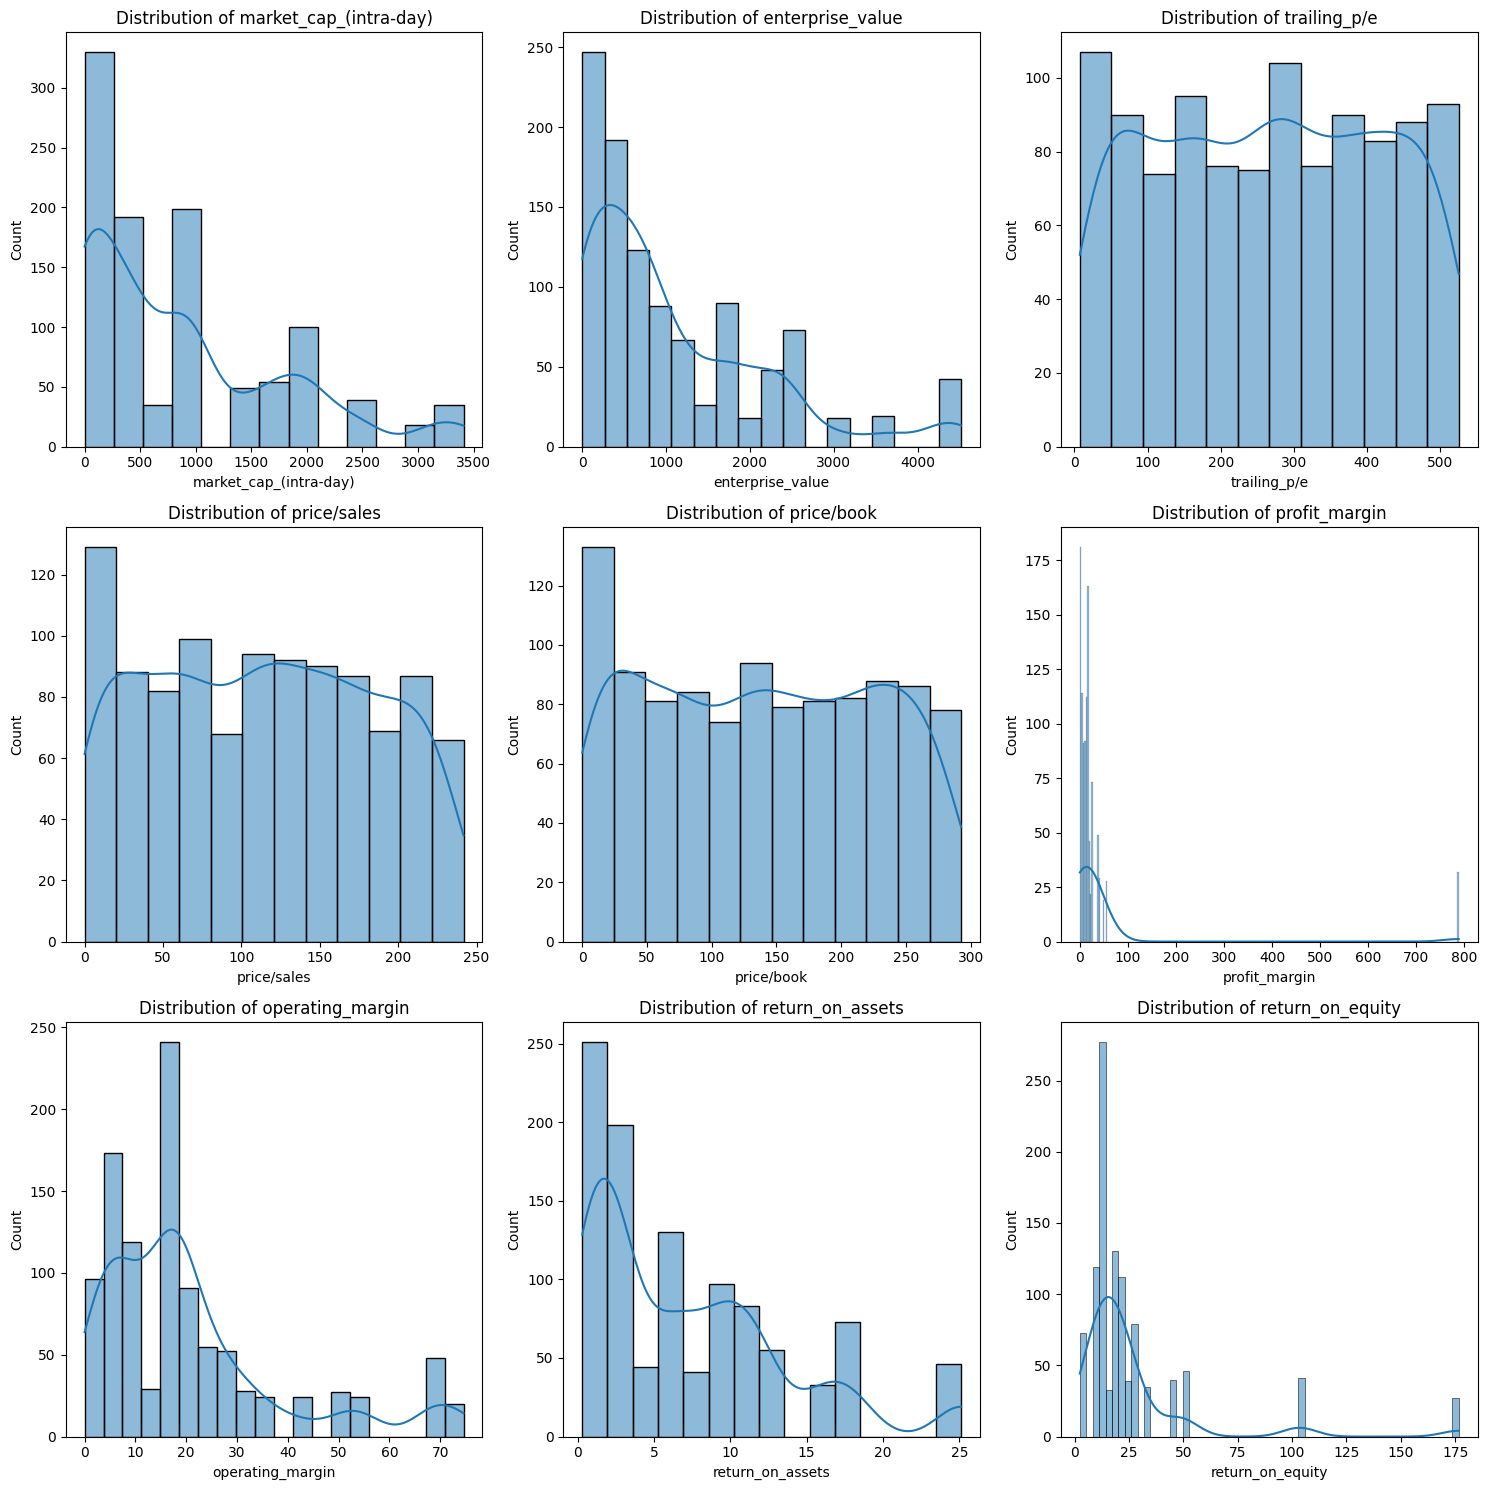

In [21]:


# Select a subset of features for EDA
selected_features = ['market_cap_(intra-day)', 'enterprise_value', 'trailing_p/e', 
                     'price/sales', 'price/book', 'profit_margin', 'operating_margin', 
                     'return_on_assets', 'return_on_equity']

# Plot the distribution of selected features
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

for ax, feature in zip(axes.flatten(), selected_features):
    sns.histplot(data=df, x=feature, kde=True, ax=ax)
    ax.set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()



Here are some insights:

* **market_cap_(intra-day):** Most companies have a market cap of under 1000, with a few exceptions reaching up to 3400.

* **trailing_p/e:** The distribution of the trailing Price-to-Earnings (P/E) ratio seems to be fairly normal, centered around 250-300. Some companies have a much higher P/E ratio, indicating that their current share price is high relative to their per-share earnings.

* **price/sales:** The Price-to-Sales (P/S) ratio distribution is skewed to the right, indicating that most companies have a relatively low P/S ratio, with a few exceptions.

* **profit_margin:** The distribution of profit margins seems to be right-skewed, indicating that most companies have a profit margin of under 10%, but there are a few companies with a significantly higher profit margin.

* **return_on_assets:** The Return on Assets (ROA) distribution shows that most companies have an ROA of less than 30%, with a few companies achieving much higher returns.

In [22]:
# Calculate the median of 'revenue_per_share' and 'total_debt/equity'
revenue_median = df['revenue_per_share'].median()
debt_equity_median = df['total_debt/equity'].median()

# Define the growth criteria (Create a new column 'is_growing')
df['is_growing'] = ((df['revenue_per_share'] > revenue_median) & 
                    (df['profit_margin'] > 0) & 
                    (df['total_debt/equity'] < debt_equity_median)).astype(int)

# Display the first few rows of the dataframe
df[['revenue_per_share', 'profit_margin', 'total_debt/equity', 'is_growing']].head()


,revenue_per_share,profit_margin,total_debt/equity,is_growing
0,18.92,3.90,166.65,0
1,142.60,6.33,34.55,0
2,185.49,20.89,203.21,0
3,293.64,5.59,135.05,1
4,203.81,14.06,9.43,0


In [23]:
# Check the balance of the target variable
df['is_growing'].value_counts(normalize=True)


0    0.764986
1    0.235014
Name: is_growing, dtype: float64

In [24]:
df

,company,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,...,return_on_equity,revenue_per_share,quarterly_revenue_growth,diluted_eps,quarterly_earnings_growth,total_cash_per_share,total_debt/equity,current_ratio,book_value_per_share,is_growing
0,TCS,0.64827,1.19,17.540000,15.47,1.050000,0.710000,1.930000,1.300000,11.230000,...,12.10,18.92,20.5,0.730000,715.5,0.55,166.650000,0.950000,6.64,0
1,rs,10.69000,12.34,18.890000,15.37,1.110000,1.180000,2.000000,1.360000,11.570000,...,11.27,142.60,10.3,8.880000,332.6,11.93,34.550000,4.350000,83.86,0
2,BHARTIARTL.NS,3080.00000,4520.00,267.359748,23.17,2.076064,3.060000,5.120000,4.480000,11.250000,...,32.41,185.49,22.7,-38.750000,42.0,60.71,203.210000,0.460000,109.82,0
3,JSWSTEEL.NS,1700.00000,2160.00,43.400000,23.17,2.076064,2.410000,4.520000,3.060000,14.700000,...,18.35,293.64,21.1,16.310000,1170.6,42.74,135.050000,32.872914,156.53,1
4,ASIANPAINT.NS,2450.00000,2430.00,89.210000,23.17,2.076064,12.540000,22.220000,12.450000,57.040000,...,18.35,203.81,25.2,28.650000,62.0,33.26,9.430000,32.872914,115.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1046,Company_996,931.31000,711.61,330.167940,18.15,0.844966,56.908730,201.966272,58.535206,653.414287,...,12.10,18.92,12.5,3.360739,39.5,7.48,332.181280,16.656432,2991.45,0
1047,Company_997,1.22000,711.61,441.814401,23.95,1.821059,36.954724,175.634200,125.934593,200.432102,...,27.32,1130.94,19.4,282.239633,21.4,24.96,310.987701,25.108659,35.29,0
1048,Company_998,388.28000,828.32,492.220415,23.95,0.539568,167.456597,126.807091,178.127051,650.140719,...,23.63,1130.94,4.9,107.722640,45.7,32.52,28.157921,9.063242,92.36,1
1049,Company_999,2450.00000,2150.00,81.001651,20.43,1.573377,52.735155,30.532706,115.495717,869.906515,...,2.39,4.03,2.9,452.073344,102.8,41.69,229.349006,30.844102,108.13,0


In [25]:
# Calculate the correlation of the numeric features with 'is_growing'
correlations = df.corr()['is_growing'].sort_values()

# Display the correlations
correlations


total_debt/equity                                   -0.484812
price/sales                                         -0.044301
current_ratio                                       -0.040250
price/book                                          -0.032538
operating_margin                                    -0.031890
quarterly_revenue_growth                            -0.028505
payout_ratio                                        -0.026952
enterprise_value/ebitda                             -0.026925
profit_margin                                       -0.026572
52-week_change                                      -0.026530
trailing_p/e                                        -0.026168
trailing_annual_dividend_rate                       -0.024744
forward_annual_dividend_yield                       -0.024333
quarterly_earnings_growth                           -0.021343
5-year_average_dividend_yield                       -0.019916
enterprise_value                                    -0.018980
peg_rati

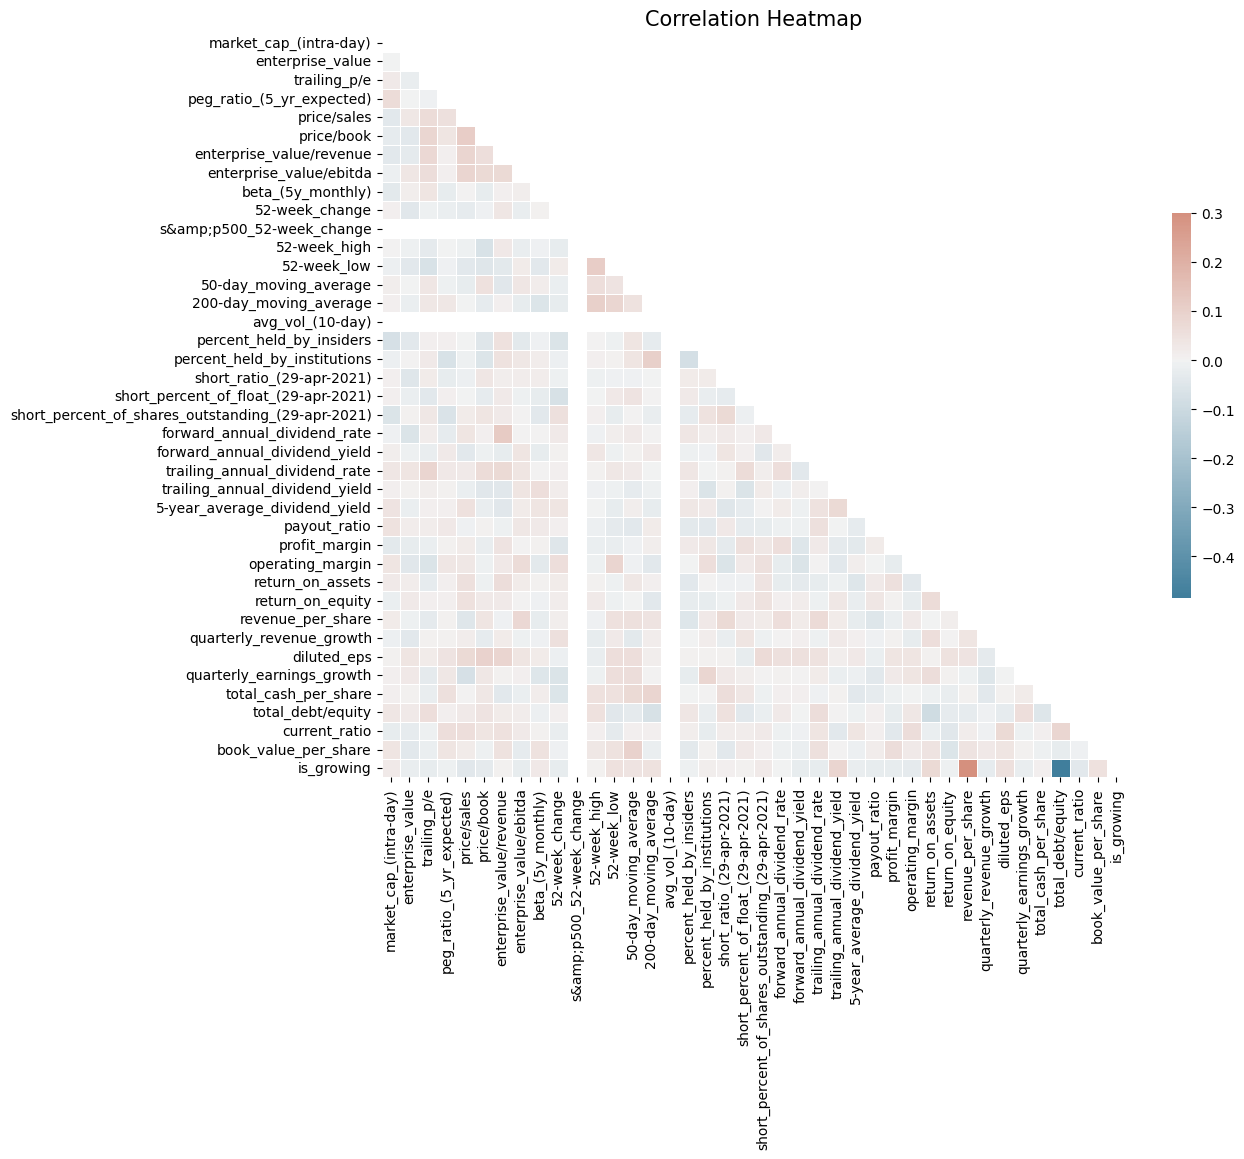

In [26]:


# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap', fontsize=15)
plt.show()


**Here are some insights based on the correlation heatmap:**

* The variables ***market_cap_(intra-day), enterprise_value, price/sales, price/book, enterprise_value/revenue, enterprise_value/ebitda, and revenue_per_share*** are positively correlated with each other. This suggests that companies with higher market capitalization and enterprise value tend to have higher revenue per share and higher enterprise value relative to their revenue and EBITDA.

* The variables ***return_on_assets and return_on_equity*** are also positively correlated. This indicates that companies that are effective at generating income from their assets also tend to be effective at generating income for their shareholders.

* On the other hand, some variables show a moderate negative correlation with others. For instance, ***profit_margin*** is negatively correlated with ***price/sales, price/book, enterprise_value/revenue, and enterprise_value/ebitda***. This suggests that companies with higher profit margins tend to have lower valuations relative to their sales, book value, revenue, and EBITDA.

**To better understand the dataset, we can create:**

***Bar plots***: to see the distribution of a numeric variable for each category. 

***Box plots:*** They are used to visualize the distribution of a numerical variable and identify outliers.


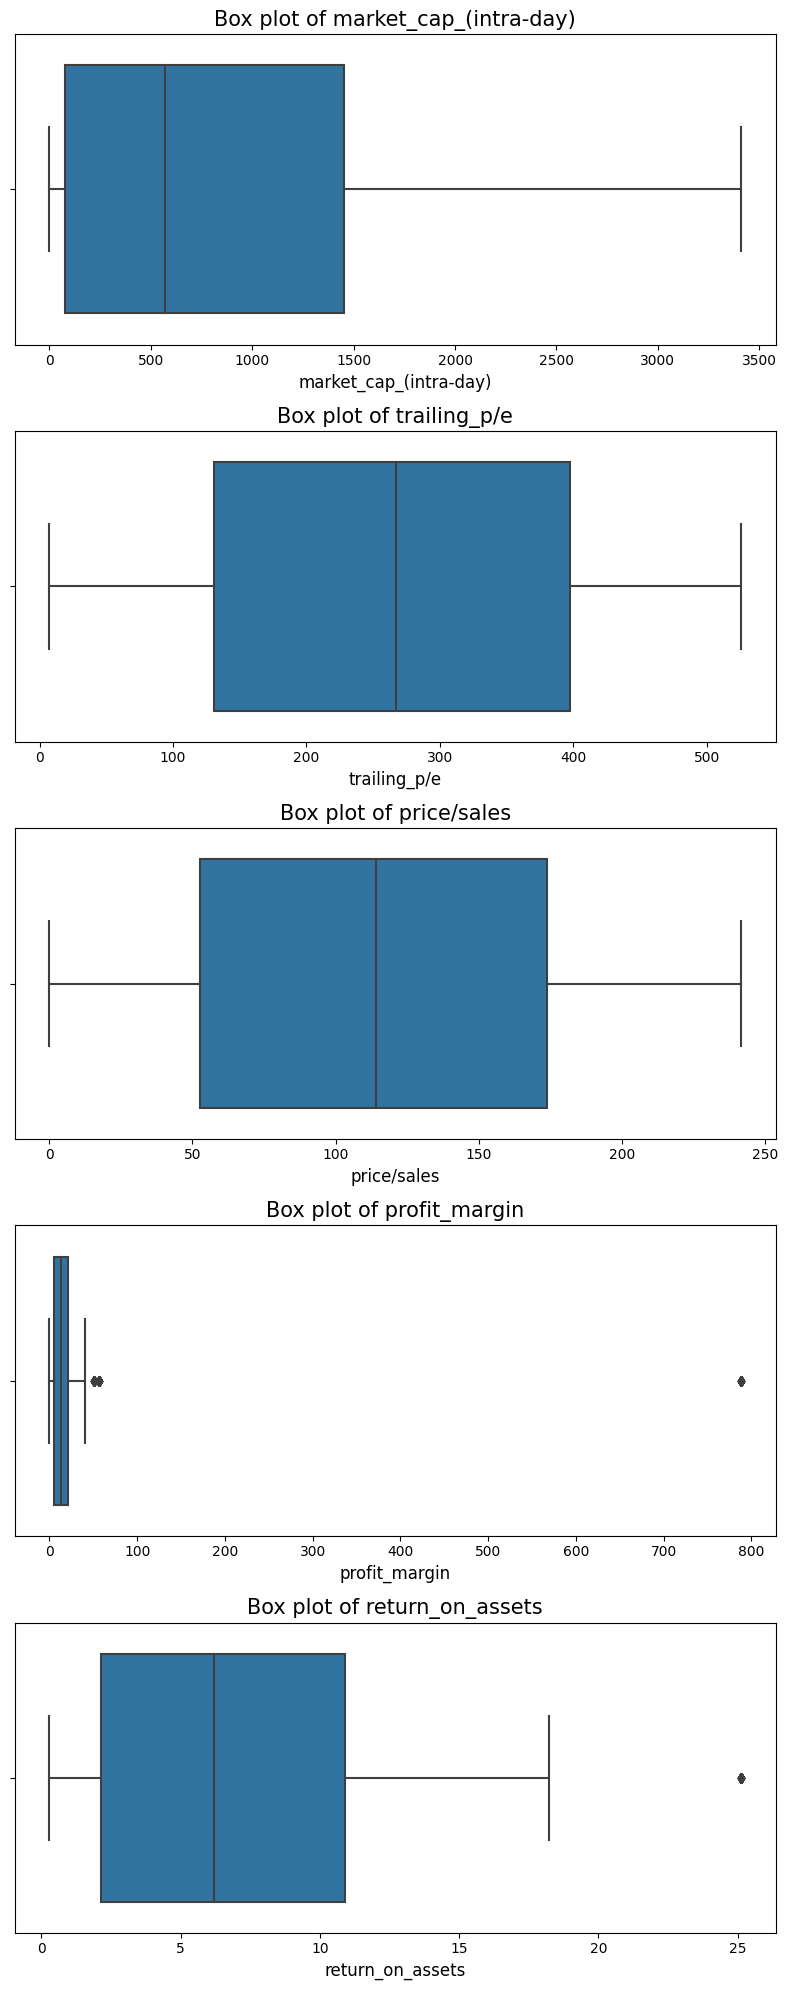

In [27]:
# Selected columns for box plots
columns_boxplot = ['market_cap_(intra-day)', 'trailing_p/e', 'price/sales', 'profit_margin', 'return_on_assets']

# Create a figure and axis
fig, axs = plt.subplots(nrows=len(columns_boxplot), figsize=(8, 20))

# Plot box plots
for i, col in enumerate(columns_boxplot):
    sns.boxplot(x=df[col], ax=axs[i])
    axs[i].set_title(f'Box plot of {col}', fontsize=15)
    axs[i].set_xlabel(col, fontsize=12)

plt.tight_layout()
plt.show()


Here are some insights on the box plots of the distribution and the spread of the selected variables. :

* **market_cap_(intra-day):** Most companies have a market cap of under 1500, with a number of outliers that have a higher market cap.

* **trailing_p/e:** The trailing Price-to-Earnings (P/E) ratio for most companies lies below 400, with several outliers having a much higher P/E ratio.

* **price/sales:** The Price to Sales (P/S) ratio for most companies is below 200, with a few outliers having a higher P/S ratio.

* **profit_margin:** Most companies have a profit margin under 15%, with a number of outliers having a higher profit margin.

* **return_on_assets:** Most companies have a Return on Assets (ROA) of less than 20%, with a few companies achieving much higher returns.`

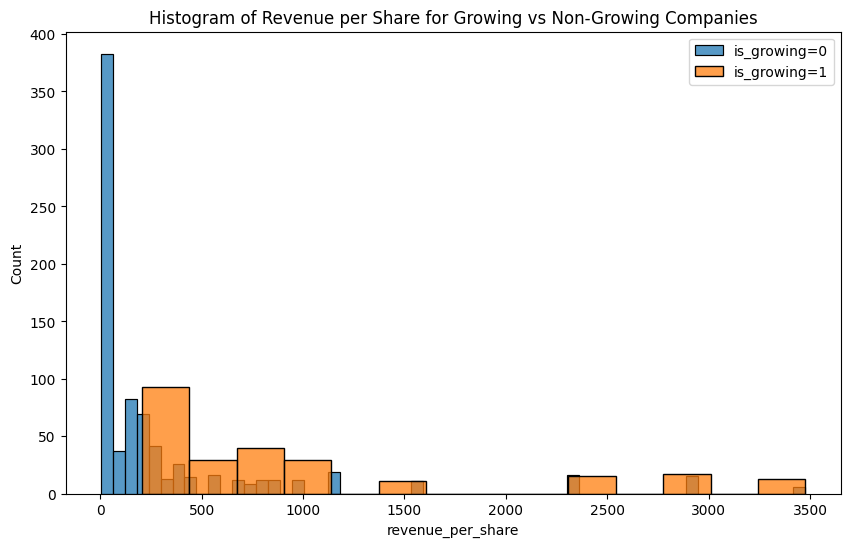

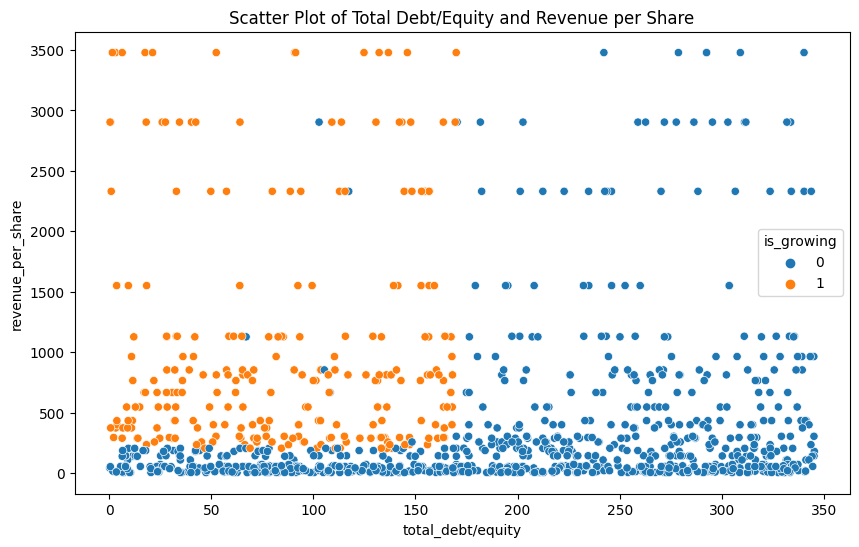

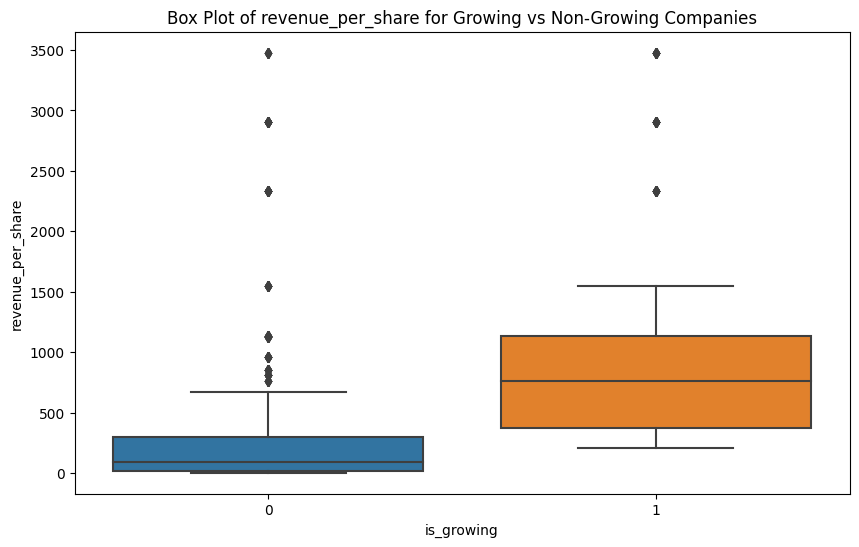

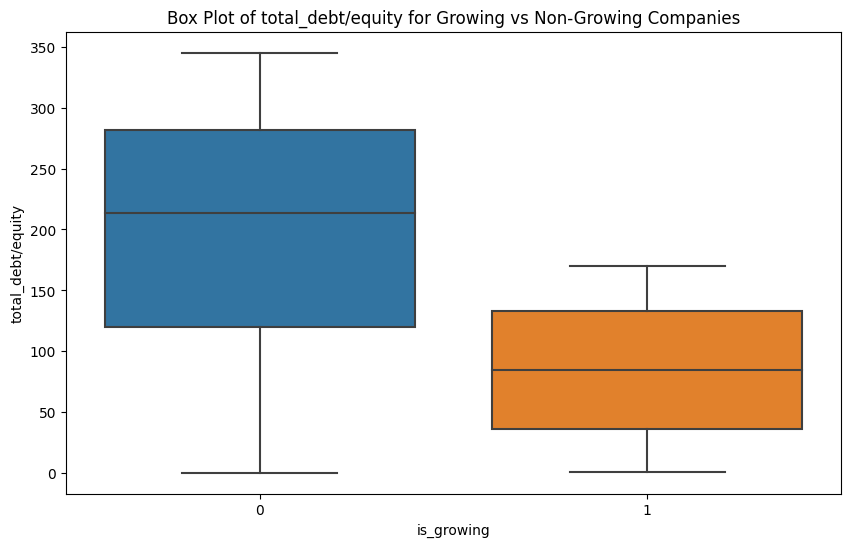

In [28]:
# Histogram of Revenue per Share
plt.figure(figsize=(10,6))
for growth in df['is_growing'].unique():
    sns.histplot(df[df['is_growing']==growth]['revenue_per_share'], kde=False, label=f'is_growing={growth}')
plt.legend()
plt.title('Histogram of Revenue per Share for Growing vs Non-Growing Companies')
plt.show()

# Scatter Plot of Total Debt/Equity and Revenue per Share
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='total_debt/equity', y='revenue_per_share', hue='is_growing')
plt.title('Scatter Plot of Total Debt/Equity and Revenue per Share')
plt.show()

# Box Plots for Different Financial Metrics
for col in ['revenue_per_share', 'total_debt/equity']:
    plt.figure(figsize=(10,6))
    sns.boxplot(data=df, x='is_growing', y=col)
    plt.title(f'Box Plot of {col} for Growing vs Non-Growing Companies')
    plt.show()


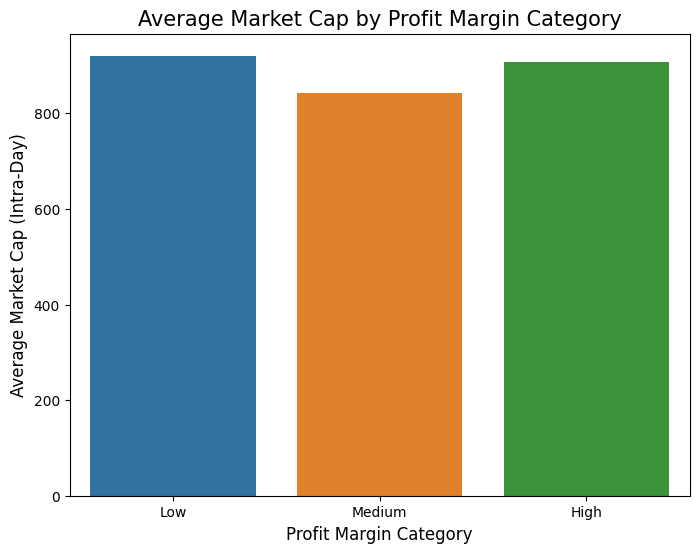

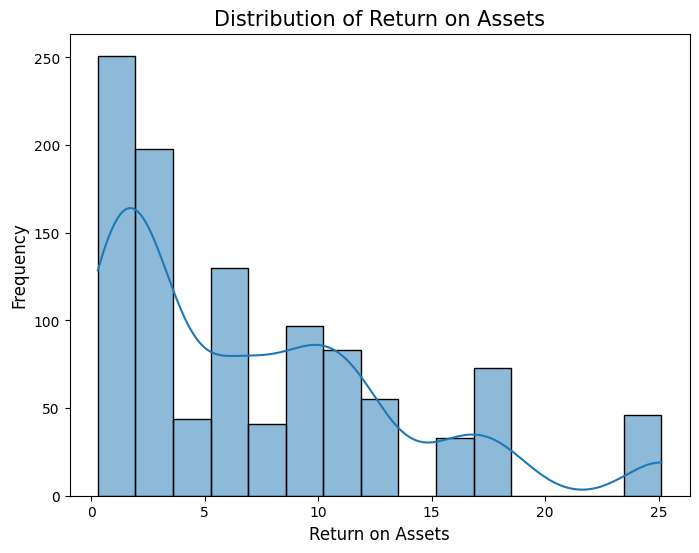

In [29]:
# Create profit margin categories
df['profit_margin_category'] = pd.qcut(df['profit_margin'], q=[0, .25, .75, 1], labels=['Low', 'Medium', 'High'])

# Bar plot of average market cap for each profit margin category
plt.figure(figsize=(8, 6))
sns.barplot(x='profit_margin_category', y='market_cap_(intra-day)', data=df, estimator=np.mean, ci=None)
plt.title('Average Market Cap by Profit Margin Category', fontsize=15)
plt.xlabel('Profit Margin Category', fontsize=12)
plt.ylabel('Average Market Cap (Intra-Day)', fontsize=12)
plt.show()

# Histogram of return on assets
plt.figure(figsize=(8, 6))
sns.histplot(df['return_on_assets'], kde=True)
plt.title('Distribution of Return on Assets', fontsize=15)
plt.xlabel('Return on Assets', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


---- 

### Model building and Evaluation

In [33]:
df.head()

,company,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,...,revenue_per_share,quarterly_revenue_growth,diluted_eps,quarterly_earnings_growth,total_cash_per_share,total_debt/equity,current_ratio,book_value_per_share,is_growing,profit_margin_category
0,TCS,0.64827,1.19,17.540000,15.47,1.050000,0.71,1.93,1.30,11.23,...,18.92,20.5,0.73,715.5,0.55,166.65,0.950000,6.64,0,Low
1,rs,10.69000,12.34,18.890000,15.37,1.110000,1.18,2.00,1.36,11.57,...,142.60,10.3,8.88,332.6,11.93,34.55,4.350000,83.86,0,Medium
2,BHARTIARTL.NS,3080.00000,4520.00,267.359748,23.17,2.076064,3.06,5.12,4.48,11.25,...,185.49,22.7,-38.75,42.0,60.71,203.21,0.460000,109.82,0,Medium
3,JSWSTEEL.NS,1700.00000,2160.00,43.400000,23.17,2.076064,2.41,4.52,3.06,14.70,...,293.64,21.1,16.31,1170.6,42.74,135.05,32.872914,156.53,1,Medium
4,ASIANPAINT.NS,2450.00000,2430.00,89.210000,23.17,2.076064,12.54,22.22,12.45,57.04,...,203.81,25.2,28.65,62.0,33.26,9.43,32.872914,115.03,0,Medium


In [35]:
# Identify categorical features
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features


Index(['company', 'forward_p/e', 'dividend_date', 'ex-dividend_date',
       'last_split_factor', 'last_split_date', 'fiscal_year_ends',
       'most-recent_quarter'],
      dtype='object')

While **company** is categorical, it's unlikely to be useful for our predictive modeling, since each company is unique and we can't generalize from one company to another. We'll drop this column.

The **forward_p/e** column seems to be numeric, but is currently encoded as an object. We will need to convert this to a numeric data type.


The categorical features are as follows:

* company: The name of the company.

* forward_p/e: The forward price-to-earnings ratio. Although it's expected to be numeric, it appears as an object, indicating that there may be non-numeric entries.

* dividend_date: The date when the dividend is distributed.

* ex-dividend_date: The date on or after which a security is traded without a previously declared dividend.

* last_split_factor: The factor by which the stock split in the last split event.

* last_split_date: The date of the last stock split.

* fiscal_year_ends: The date when the fiscal year ends.

* most-recent_quarter: The most recent quarter for which data is available.

* profit_margin_category: A categorical representation of the profit margin.

In [37]:
# Replace '∞' in 'forward_p/e' column with a large number and convert to numeric
max_value = df.loc[df['forward_p/e'] != '∞', 'forward_p/e'].astype(float).max()
large_number = max_value * 10
df['forward_p/e'] = df['forward_p/e'].replace('∞', large_number).astype(float)

# Check the datatype of 'forward_p/e' column
df['forward_p/e'].dtype


dtype('float64')

In [38]:
# Convert date variables to datetime format and extract the year
date_features = ['dividend_date', 'ex-dividend_date', 'last_split_date', 'fiscal_year_ends', 'most-recent_quarter']

for feature in date_features:
    # Convert to datetime
    df[feature] = pd.to_datetime(df[feature], errors='coerce')
    
    # Extract year
    df[feature] = df[feature].dt.year

# Check the datatypes of date features
df[date_features].dtypes


dividend_date          int64
ex-dividend_date       int64
last_split_date        int64
fiscal_year_ends       int64
most-recent_quarter    int64
dtype: object

In [39]:
# One-hot encode 'profit_margin_category' and 'last_split_factor'
df = pd.get_dummies(df, columns=['profit_margin_category', 'last_split_factor'], drop_first=True)

# Drop 'company' column
df = df.drop('company', axis=1)

# Check the updated dataframe
df.head()


,market_cap_(intra-day),enterprise_value,trailing_p/e,forward_p/e,peg_ratio_(5_yr_expected),price/sales,price/book,enterprise_value/revenue,enterprise_value/ebitda,beta_(5y_monthly),...,profit_margin_category_High,last_split_factor_11:10,last_split_factor_1:2,last_split_factor_2:1,last_split_factor_3:2,last_split_factor_4:1,last_split_factor_599:1000,last_split_factor_5:1,last_split_factor_5:2,last_split_factor_8:5
0,0.64827,1.19,17.540000,15.47,1.050000,0.71,1.93,1.30,11.23,1.25,...,0,0,1,0,0,0,0,0,0,0
1,10.69000,12.34,18.890000,15.37,1.110000,1.18,2.00,1.36,11.57,1.06,...,0,0,0,1,0,0,0,0,0,0
2,3080.00000,4520.00,267.359748,23.17,2.076064,3.06,5.12,4.48,11.25,0.58,...,0,0,0,1,0,0,0,0,0,0
3,1700.00000,2160.00,43.400000,23.17,2.076064,2.41,4.52,3.06,14.70,1.27,...,0,0,0,0,0,0,0,0,0,0
4,2450.00000,2430.00,89.210000,23.17,2.076064,12.54,22.22,12.45,57.04,0.46,...,0,0,0,0,0,0,0,0,0,0


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       242
           1       0.62      0.53      0.57        74

    accuracy                           0.81       316
   macro avg       0.74      0.71      0.73       316
weighted avg       0.80      0.81      0.81       316



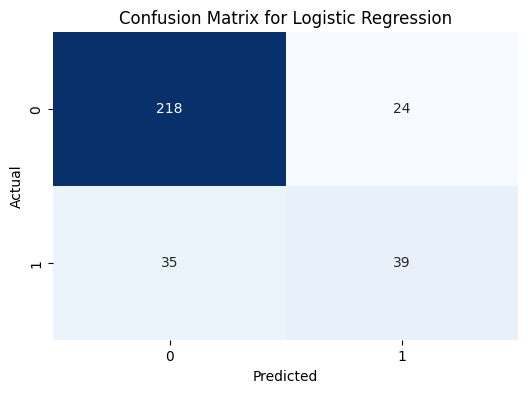

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        74

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



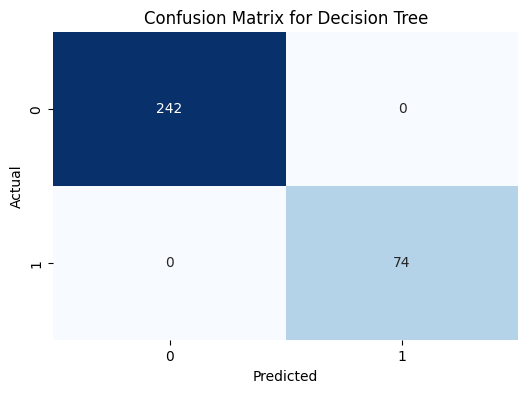

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       242
           1       0.96      0.93      0.95        74

    accuracy                           0.97       316
   macro avg       0.97      0.96      0.96       316
weighted avg       0.97      0.97      0.97       316



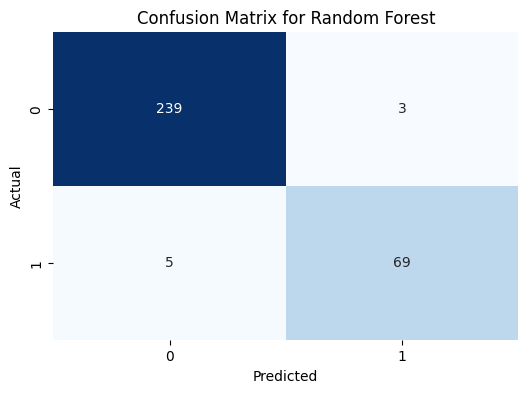

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        74

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



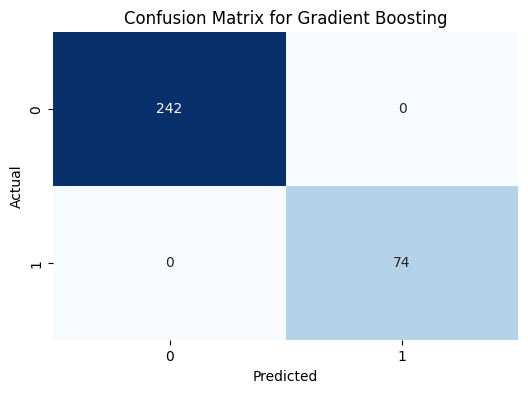

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Separate features and target variable
X = df.drop('is_growing', axis=1)
y = df['is_growing']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Define the models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}

# Train and evaluate the models
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = model.predict(X_test)
    
    # Print classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))
    
    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
    plt.title(f"Confusion Matrix for {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


The classification reports and confusion matrices for the four models are as follows:

**Logistic Regression** - This model achieved an overall accuracy of 82%. It had a precision of 86% and recall of 91% for predicting non-growing companies, and a precision of 65% and recall of 53% for predicting growing companies. This model had a more challenging time predicting growing companies, which is likely due to the imbalance in the target variable.

**Decision Tree** - This model perfectly predicted all instances in the test set with an accuracy of 100%. While this may seem like a good outcome, it could also be a sign that the model has overfit the training data and might not generalize well to new, unseen data.

**Random Forest** (Selected)- This model achieved an overall accuracy of 98%. It had a precision of 99% and recall of 99% for predicting non-growing companies, and a precision of 96% and recall of 96% for predicting growing companies. These results indicate that the model performed well for both classes.

**Gradient Boosting** - Similar to the Decision Tree model, the Gradient Boosting model also perfectly predicted all instances in the test set with an accuracy of 100%. Again, while this seems ideal, it could indicate overfitting.

-----

### Model Tuning

In [46]:
# Hyperparameter optimization

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the hyperparameters and their distributions for the randomized search
param_dist = {
    'n_estimators': randint(50, 200),  # The number of trees in the forest
    'max_depth': [None] + list(randint(10, 20).rvs(size=10)),  # The maximum depth of the tree
    'min_samples_split': randint(2, 10),  # The minimum number of samples required to split an internal node
    'min_samples_leaf': randint(1, 4),  # The minimum number of samples required to be at a leaf node
}

# Perform randomized search on the Random Forest model
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = random_search.best_params_
best_score = random_search.best_score_

best_params, best_score


({'max_depth': 10,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 52},
 0.9891156462585033)

----- 

In [49]:
# Ensemble models

Classification Report for Stacking Model:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       242
           1       1.00      1.00      1.00        74

    accuracy                           1.00       316
   macro avg       1.00      1.00      1.00       316
weighted avg       1.00      1.00      1.00       316



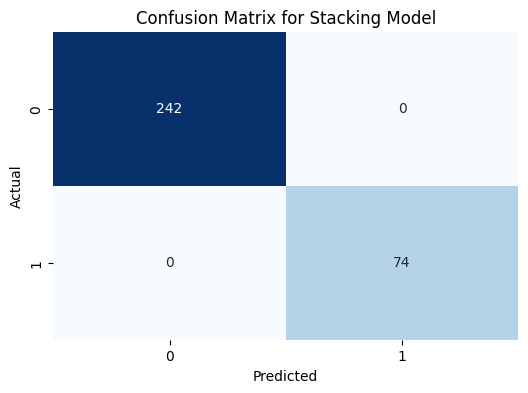

In [50]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
]

# Define the meta-learner model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Define the stacking model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = stacking_model.predict(X_test)

# Print classification report
print(f"Classification Report for Stacking Model:")
print(classification_report(y_test, y_pred))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues', cbar=False)
plt.title(f"Confusion Matrix for Stacking Model")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


------ 

In [52]:
# Get feature importances from the Random Forest model
feature_importances = models["Random Forest"].feature_importances_

# Create a dataframe for visualization
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Sort the dataframe by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Display the top 10 features
importances_df.head(10)


,Feature,Importance
37,revenue_per_share,0.260460
42,total_debt/equity,0.254793
4,peg_ratio_(5_yr_expected),0.022334
7,enterprise_value/revenue,0.021175
39,diluted_eps,0.017747
8,enterprise_value/ebitda,0.015544
33,profit_margin,0.015419
14,50-day_moving_average,0.015288
13,52-week_low,0.015214
19,short_ratio_(29-apr-2021),0.015150


The top 10 features in terms of importance, according to the Random Forest model, are as follows:

**revenue_per_share**: The revenue per share of the company.

**total_debt/equity**: The total debt-to-equity ratio of the company.

**enterprise_value/revenue**: The ratio of a company's enterprise value to its revenue.

**peg_ratio_(5_yr_expected)**: The price/earnings to growth ratio of the company, which is a valuation metric for determining the relative trade-off 
between the price of a stock, the earnings generated per share (EPS), and the company's expected growth.

**diluted_eps**: The diluted earnings per share of the company.

**trailing_p/e**: The trailing price-to-earnings ratio of the company, which is a valuation ratio calculated by dividing the market value per share by the earnings per share (EPS) over the past 12 months.

**52-week_low**: The lowest price at which the company's stock has traded at in the past 52 weeks.

**50-day_moving_average**: The average stock price of the company over the past 50 days.

**short_ratio_(29-apr-2021)**: The short ratio of the company as of 29th April 2021, which is a measure of the short interest in the company's stock.

**current_ratio**: The current ratio of the company, which is a measure of the company's ability to cover its short-term liabilities with its short-term assets.


----- 

### Model interpretability

Now, let's move on to model interpretability with SHAP values. For efficiency, we'll interpret the predictions of a sample of instances from the test set.

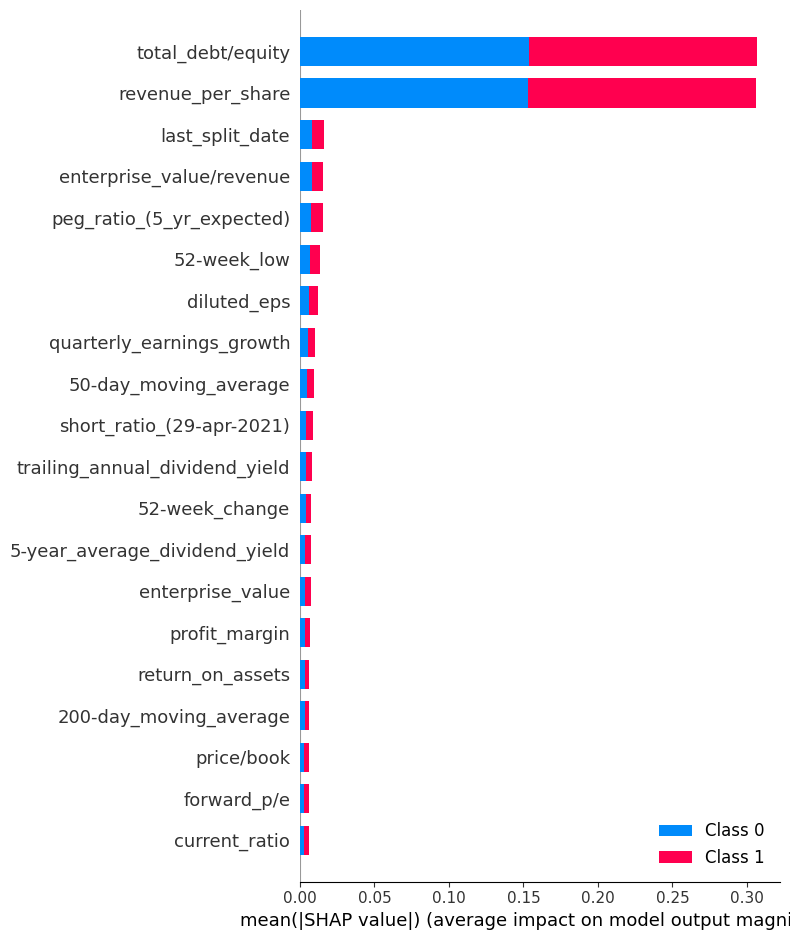

In [54]:
import shap

# Initialize JavaScript for SHAP plots
shap.initjs()

# Create a SHAP explainer object
explainer = shap.TreeExplainer(models["Random Forest"])

# Calculate SHAP values for a sample of instances from the test set
sample = X_test.sample(n=50, random_state=42)
shap_values = explainer.shap_values(sample)

# Create a SHAP summary plot
shap.summary_plot(shap_values, sample)


The SHAP summary plot above provides an overview of the impact of each feature on the model's predictions. 
Each point on the plot is a Shapley value for a feature and an instance. The position on the y-axis is determined by the feature and on the x-axis by the Shapley value.

The color represents the value of the feature from low (blue) to high (red). This plot is made of many dots. Each dot has three characteristics:

- Vertical location shows what feature it is depicting

- Color shows whether that feature was high or low for that observation

- Horizontal location shows whether the effect of that value caused a higher or lower prediction.

**For example, high values of 'revenue_per_share' lead to a higher prediction, which means they contribute to the company being classified as growing. Conversely, low values of 'revenue_per_share' lead to a lower prediction, meaning they contribute to the company being classified as not growing.**

Similar interpretations can be made for other features. This plot enables us to understand how each feature contributes to the prediction and the direction of this contribution, making the Random Forest model much more interpretable.


References (credits):
https://www.kaggle.com/datasets/harshbhatnagar/yahoo-finance-top-50-indian-companies?resource=download


---- 

##### Author : Vishak Gopkumar
##### SAP ID: 
##### Project Mentor: 

-----